In [ ]:
!python pytorch/data_preprocess.py --mode fix_problem

Fixed: Dataset/MazurkaBL-master/beat_time/M41-1beat_time.csv
Fixed: Dataset/MazurkaBL-master/beat_dyn/M41-1beat_dynNORM.csv


In [3]:
!python pytorch/data_preprocess.py --mode cleanup_meta

[Mode] Generating cleaned meta CSVs...
Found 46 beat_time files.
[Issue1 Solved] Skipped M06-4: unusual dynamic markings.                                            
[Issue3 Solved] M17-3 markings start from beat 49. Filled mf in between                             
[Issue3 Solved] M24-2 markings start from beat 37. Filled mf in between                             
[Issue3 Solved] M41-4 markings start from beat 71. Filled mf in between                             
[Issue3 Solved] M50-2 markings start from beat 51. Filled mf in between                             
[Issue3 Solved] M50-3 markings start from beat 101. Filled mf in between                            
[Issue3 Solved] M59-2 markings start from beat 67. Filled mf in between                             
[Issue3 Solved] M63-1 markings start from beat 25. Filled mf in between                             
[Issue1 Solved] Skipped M63-2: unusual dynamic markings.                                            
[Issue3 Solved] M67-4 mark

In [1]:
!python pytorch/data_preprocess.py --mode pack_h5 --sample_rate 22050

[Mode] Packing Mazurka dataset to HDF5...
Start packing Mazurka dataset: ../202505_dynest_data/Dataset/mazurka_audio
[Issue1 Solved] Skipping excluded opus: M06-4                                   
[WARN] PID '7992-03' in opus '17-4' not found in discography. Using 'Unknown' for performer and -1 for duration.
[WARN] Audio peak 1.0029 > 1.0 in M41-1 / pid9114b-10.wav. Been normalized.     
[Issue1 Solved] Skipping excluded opus: M63-2                                   
Processing MazurkaID: 100%|█████████████████████| 46/46 [07:32<00:00,  9.83s/it]
Finished writing HDF5 files to /media/datadisk/home/22828187/zhanh/202505_dynest_data/workspaces/hdf5s/mazurka_sr22050


In [ ]:
!python pytorch/data_preprocess.py --mode pack_h5 --sample_rate 16000
!python pytorch/data_preprocess.py --mode pack_h5 --sample_rate 44100
!python pytorch/data_preprocess.py --mode pack_h5 --sample_rate 48000

In [1]:
!python pytorch/feature_extractor.py\
    ./workspaces/hdf5s/mazurka_sr44100/mazurka06-1/pid1263-01.h5 \
    ./pid1263-01_our_sone.csv \
    --mode ntot \
    --sample_rate 44100 \
    --frames_per_second 86

[✅] Saved feature CSV to ./pid1263-01_our_sone.csv


In [ ]:
!python pytorch/feature_extractor.py\
    ./workspaces/hdf5s/mazurka_sr44100/mazurka06-1/pid1263-01.h5 \
    ./pid1263-01_mosqito_sone.csv \
    --mode mosqito_sone \
    --sample_rate 44100 \
    --frames_per_second 86

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[DEBUG] MoSQITo raw features shape: (100264, 1)
[DEBUG] MoSQITo raw time shape: 100264
[✅] Saved feature CSV to ./pid1263-01_mosqito_sone_48k_v1.csv


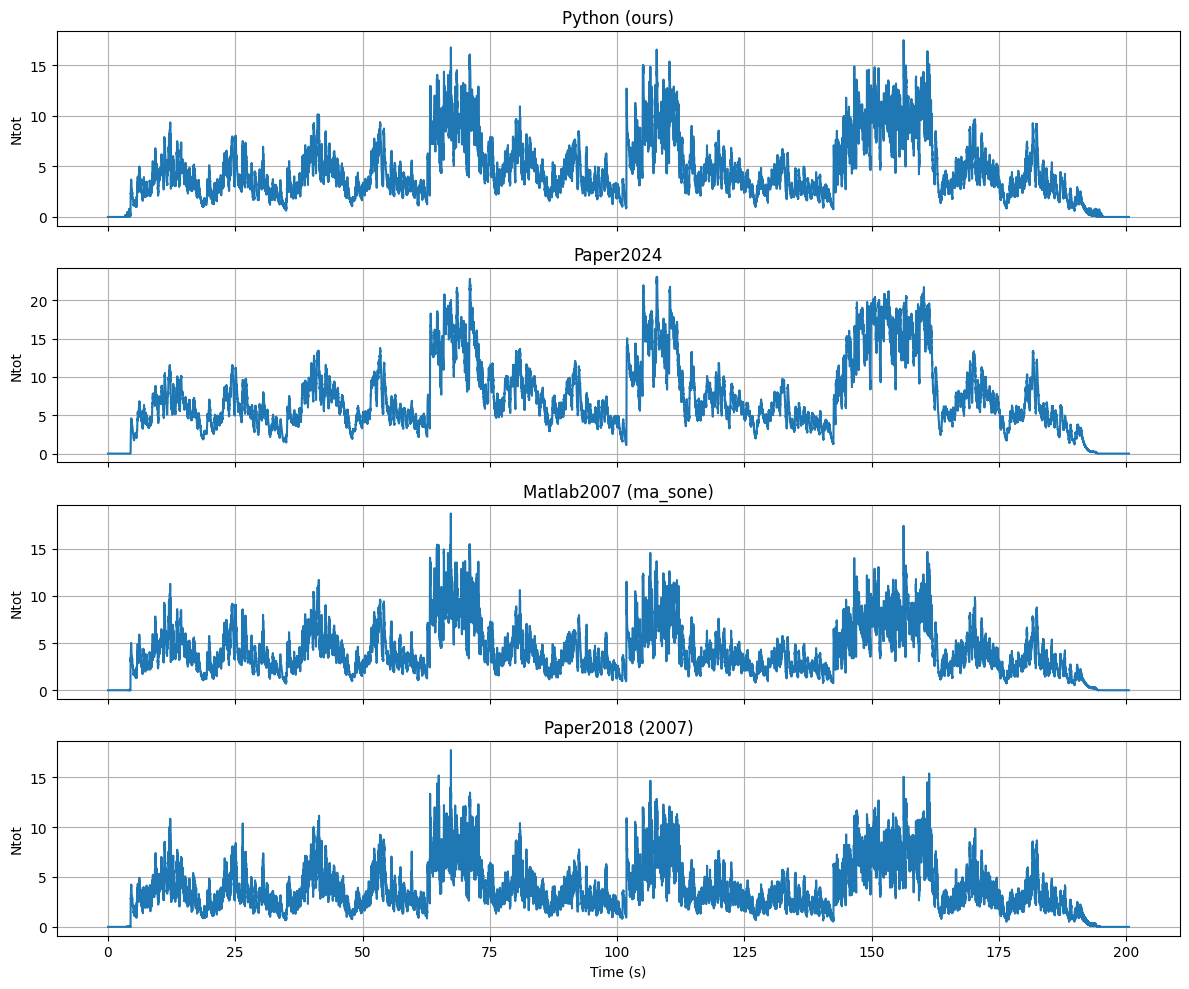

In [25]:
from pytorch.plot_utils import compare_sones_diff_methods

csv_files = [
    "others/different_sones/pid1263-01_our_sone.csv",
    "others/different_sones/pid1263-01_mosqito_sone.csv",
    "others/different_sones/pid1263-01_matlab.csv",
    "Dataset/MazurkaBL-master/sones/M06-1/pid1263-01Ntot.csv",
]

titles = ["Python (ours)", "Paper2024", "Matlab2007 (ma_sone)", "Paper2018 (2007)"]

compare_sones_diff_methods(csv_files, titles)

In [ ]:
!python pytorch/feature_extractor.py\
    ../202505_dynest_data/workspaces/hdf5s/mazurka_sr44100/mazurka06-1/pid1263-01.h5\
    plot/logmel.csv\
    --mode logmel --sample_rate 44100 --fft_size 1024 --frames_per_second 86 --plot_path plot/logmel.png

from IPython.display import Image, display
display(Image(filename="/media/datadisk/home/22828187/zhanh/piano-dynamic-estimation/plot/sone.png"))

Saved feature CSV to plot/logmel.csv
Saved feature plot to plot/logmel.png
Saved feature CSV to plot/sone.csv
Saved feature plot to plot/sone.png


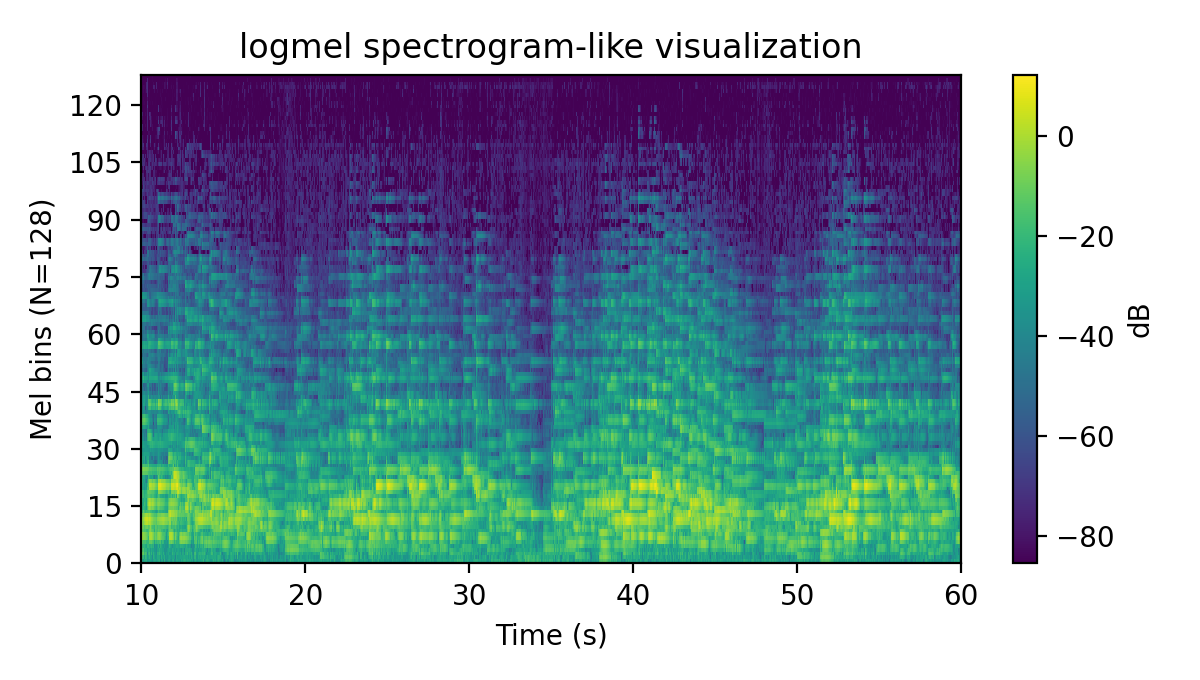

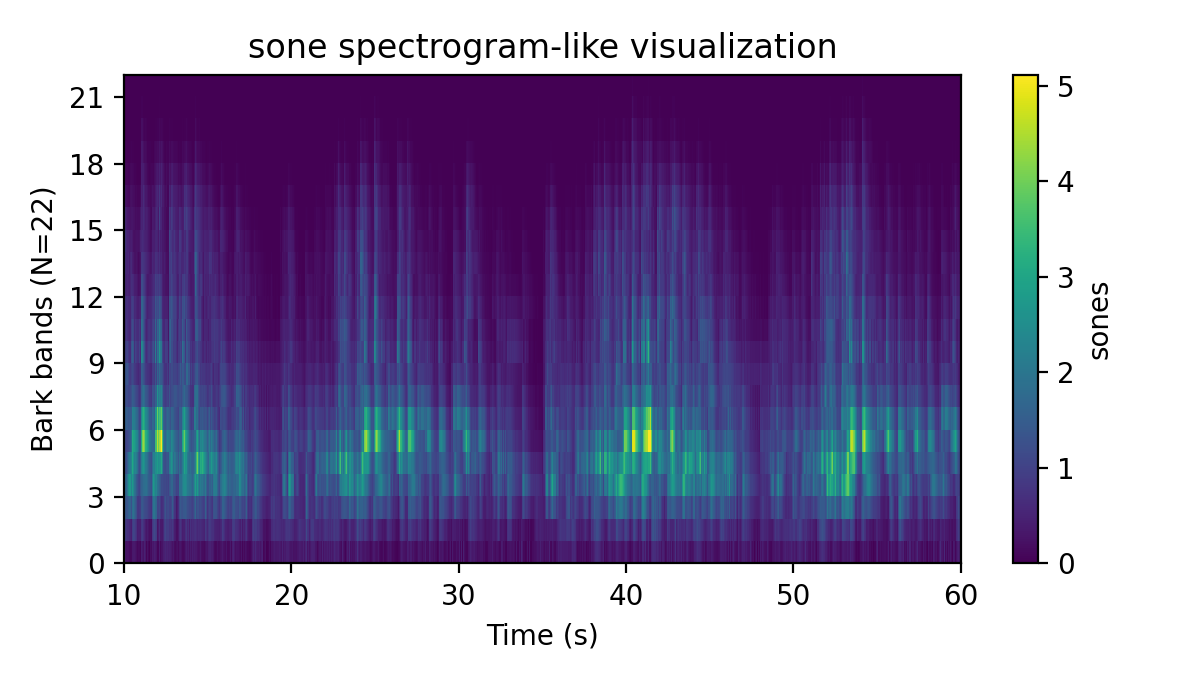

In [24]:
!python pytorch/feature_extractor.py\
    ../202505_dynest_data/workspaces/hdf5s/mazurka_sr22050/mazurka06-1/pid1263-01.h5\
    plot/logmel.csv\
    --mode logmel --sample_rate 22050 --fft_size 1024 --frames_per_second 50 --plot_path plot/logmel.png

!python pytorch/feature_extractor.py\
    ../202505_dynest_data/workspaces/hdf5s/mazurka_sr22050/mazurka06-1/pid1263-01.h5\
    plot/sone.csv\
    --mode sone --sample_rate 22050 --fft_size 1024 --frames_per_second 50 --plot_path plot/sone.png

from IPython.display import Image, display
display(Image(filename="/media/datadisk/home/22828187/zhanh/piano-dynamic-estimation/plot/logmel.png"))
display(Image(filename="/media/datadisk/home/22828187/zhanh/piano-dynamic-estimation/plot/sone.png"))